In [1]:
import pandas as pd
import numpy as np

/Users/vega7unk/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import os
print(os.getcwd())

/Users/vega7unk/Documents/4th Sem DSI/ilab project/ilab-group-12-1-fall-detection/notebooks


In [3]:
pd.set_option('display.max_columns', None)

df = pd.read_pickle("../data/raw/df_resample_100ms.pkl")

In [4]:
df.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label,subject_id,trial,age,height,weight,gender
timestamp,,,,,,,,,,,,,
1970-01-01 00:38:38.700,0.948777,-9.636166,0.002699,0.003818,0.016875,0.006643,BSC,1.0,1.0,32.0,180.0,85.0,M
1970-01-01 00:38:38.800,0.948993,-9.759188,0.087482,0.020693,0.027565,0.015669,BSC,1.0,1.0,32.0,180.0,85.0,M
1970-01-01 00:38:38.900,1.071514,-9.787465,-0.093610,0.168721,0.075747,0.037797,BSC,1.0,1.0,32.0,180.0,85.0,M
1970-01-01 00:38:39.000,1.135679,-9.754036,0.065878,0.339488,0.078970,0.040134,BSC,1.0,1.0,32.0,180.0,85.0,M
1970-01-01 00:38:39.100,1.126174,-9.443248,0.075006,0.594494,-0.012065,0.103557,BSC,1.0,1.0,32.0,180.0,85.0,M


In [5]:
data = df.copy()

In [6]:
data.drop(['subject_id','trial','age','height','weight','gender'], axis=1, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 846950 entries, 1970-01-01 00:38:38.700000 to 1970-01-01 04:49:55.600000
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   acc_x   846950 non-null  float64
 1   acc_y   846950 non-null  float64
 2   acc_z   846950 non-null  float64
 3   gyro_x  846950 non-null  float64
 4   gyro_y  846950 non-null  float64
 5   gyro_z  846950 non-null  float64
 6   label   846950 non-null  object 
dtypes: float64(6), object(1)
memory usage: 51.7+ MB


## Apply a low pass filter 

Using Butterworth filter, to further smooth data.

In [8]:
import scipy.signal as signal

def apply_low_pass_filter(data, cutoff=3, fs=10, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    df_filtered = data.copy()
    for col in ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']:
        df_filtered[col] = signal.filtfilt(b, a, data[col])
    return df_filtered

df_lpf = apply_low_pass_filter(data)


In [9]:
df_lpf.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
timestamp,,,,,,,
1970-01-01 00:38:38.700,0.948663,-9.636215,0.002786,0.003675,0.016768,0.006653,BSC
1970-01-01 00:38:38.800,0.926452,-9.752515,0.032618,0.029569,0.049813,0.018963,BSC
1970-01-01 00:38:38.900,1.086636,-9.797180,-0.025603,0.145156,0.084243,0.032240,BSC
1970-01-01 00:38:39.000,1.178256,-9.731493,0.007527,0.372861,0.020013,0.049501,BSC
1970-01-01 00:38:39.100,1.016914,-9.499515,0.145944,0.576895,0.024343,0.085384,BSC


cutoff=3: Retains meaningful signals below 3 Hz.

fs=10: Sampling frequency (10 Hz).

**Normalize Sensor Data**

Scale sensor readings to ensure balanced input for CNN:

In [10]:
df_normalize = df_lpf.copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']
df_normalize[sensor_cols] = scaler.fit_transform(df_normalize[sensor_cols])


In [11]:
df_normalize.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label
timestamp,,,,,,,
1970-01-01 00:38:38.700,0.209754,-2.331582,-0.203113,0.037081,0.031012,-0.012518,BSC
1970-01-01 00:38:38.800,0.203321,-2.349069,-0.194536,0.066225,0.079630,0.009396,BSC
1970-01-01 00:38:38.900,0.249716,-2.355785,-0.211275,0.196319,0.130287,0.033033,BSC
1970-01-01 00:38:39.000,0.276253,-2.345908,-0.201750,0.452604,0.035785,0.063763,BSC
1970-01-01 00:38:39.100,0.229522,-2.311028,-0.161954,0.682246,0.042157,0.127645,BSC


In [12]:
df_lpf_normalize = df_normalize.copy()

# Specify the directory and filename
directory = "../data"
filename = "df_lpf_normalize.pkl"
filepath = os.path.join(directory, filename)

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame as a pickle file
df_lpf_normalize.to_pickle(filepath)

# Data Augmentation

In [13]:
df_aug = df_lpf.copy()

fall_labels = ['FOL', 'FKL', 'BSC', 'SDL']

# Create a flag for fall activities
df_aug['is_fall'] = df_aug['label'].apply(lambda x: 1 if x in fall_labels else 0)

# Separate into fall and non-fall datasets
fall_df = df_aug[df_aug['is_fall'] == 1].copy()
adl_df = df_aug[df_aug['is_fall'] == 0].copy()

In [14]:
df_aug.head()

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,label,is_fall
timestamp,,,,,,,,
1970-01-01 00:38:38.700,0.948663,-9.636215,0.002786,0.003675,0.016768,0.006653,BSC,1
1970-01-01 00:38:38.800,0.926452,-9.752515,0.032618,0.029569,0.049813,0.018963,BSC,1
1970-01-01 00:38:38.900,1.086636,-9.797180,-0.025603,0.145156,0.084243,0.032240,BSC,1
1970-01-01 00:38:39.000,1.178256,-9.731493,0.007527,0.372861,0.020013,0.049501,BSC,1
1970-01-01 00:38:39.100,1.016914,-9.499515,0.145944,0.576895,0.024343,0.085384,BSC,1


In [15]:
df_aug['is_fall'].value_counts()

is_fall
0    827646
1     19304
Name: count, dtype: int64

In [16]:
fall_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19304 entries, 1970-01-01 00:38:38.700000 to 1970-01-01 04:57:28.200000
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   acc_x    19304 non-null  float64
 1   acc_y    19304 non-null  float64
 2   acc_z    19304 non-null  float64
 3   gyro_x   19304 non-null  float64
 4   gyro_y   19304 non-null  float64
 5   gyro_z   19304 non-null  float64
 6   label    19304 non-null  object 
 7   is_fall  19304 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 1.3+ MB


## Window Fall and ADL data

Now that we’ve separated the fall and ADL data, the next step is to convert the continuous time-series into overlapping windows, which are typically needed for deep learning models like CNNs, LSTMs, or hybrid CNN-LSTM architectures

Parameters:

Window size: 2.5 seconds → at 100ms sampling rate → 25 samples

Step size: 50% overlap → 12 samples

In [17]:
sensor_cols = ['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']

# Define windowing function
def create_windows(df, sensor_cols, window_size=25, step_size=12):
    X = []
    y = []
    data = df[sensor_cols + ['label']].reset_index(drop=True)

    for start in range(0, len(data) - window_size + 1, step_size):
        end = start + window_size
        window = data.iloc[start:end]
        if len(window) == window_size:
            X.append(window[sensor_cols].values)
            y.append(window['label'].iloc[-1])  # assign label from last time step
    return np.array(X), np.array(y)

In [18]:
# Apply windowing
X_fall, y_fall = create_windows(fall_df, sensor_cols)
X_adl, y_adl = create_windows(adl_df, sensor_cols)

In [19]:
with open("../data/processed/fall_windows.pkl", "wb") as f:
    pd.to_pickle((X_fall, y_fall), f)

with open("../data/processed/adl_windows_.pkl", "wb") as f:
    pd.to_pickle((X_adl, y_adl), f)

## Augmentation on Fall data 

In [20]:
X_fall, y_fall = pd.read_pickle("../data/processed/fall_windows.pkl")

## Jitters

What it does: Adds small random noise to each sensor value in the window.

Why it helps: Simulates slight variations in sensor readings due to real-world differences in movement, placement, etc.

How it’s applied: On each sample in X_fall without altering y_fall

In [21]:
# Define jittering function
def jitter(X, sigma=1.0):
    return X + np.random.normal(loc=0.0, scale=sigma, size=X.shape)

# Apply jittering
X_fall_aug = jitter(X_fall)
y_fall_aug = y_fall.copy()

In [22]:
with open("../data/processed/fall_windows_jittered.pkl", "wb") as f:
    pd.to_pickle((X_fall_aug, y_fall_aug), f)

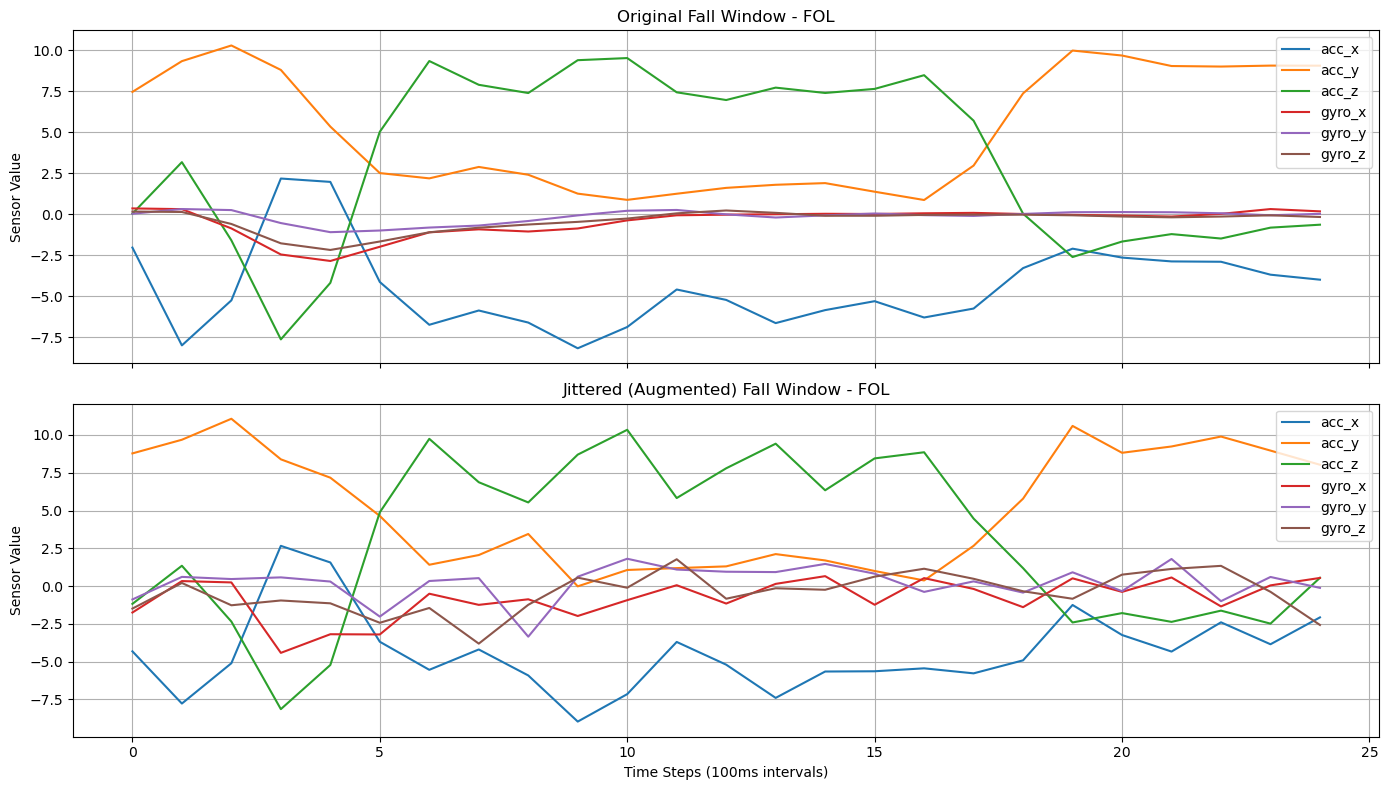

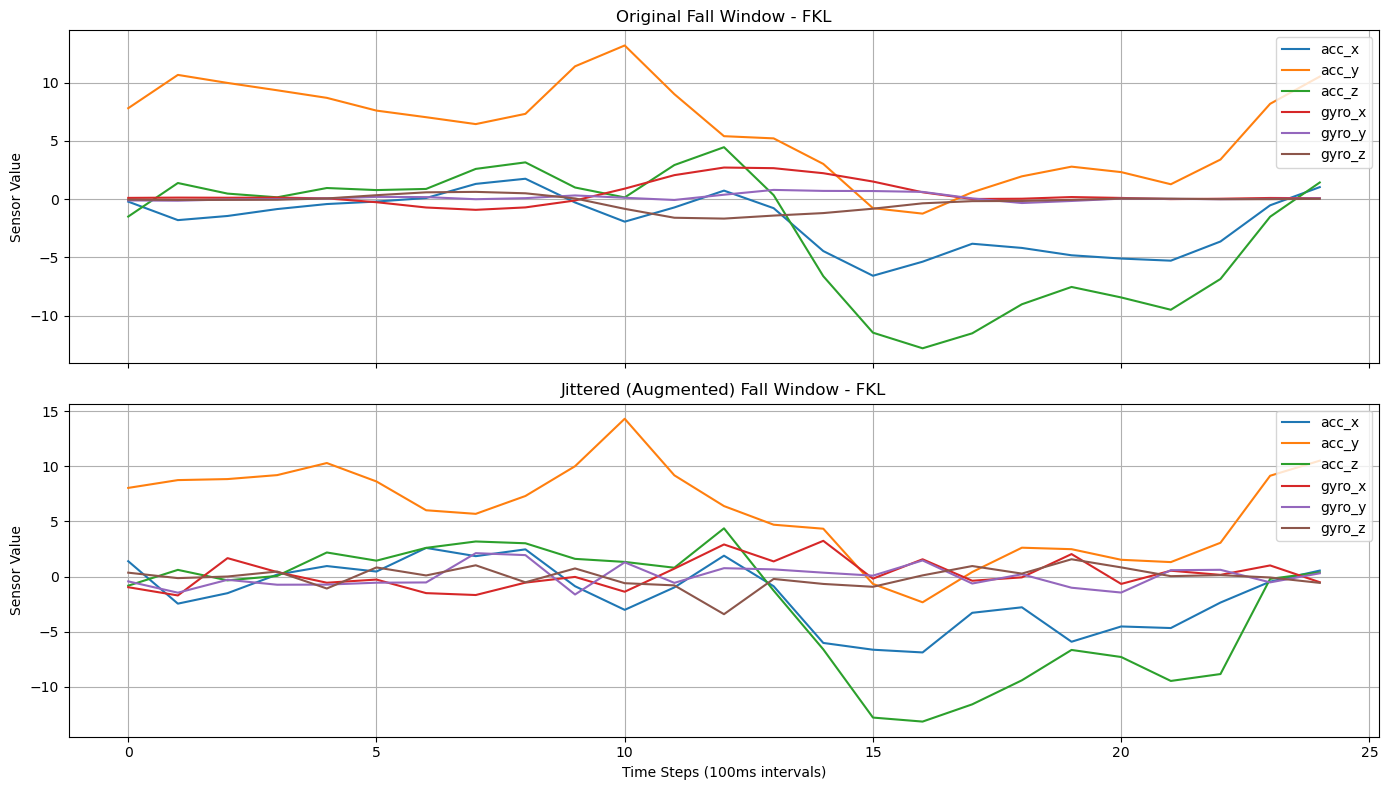

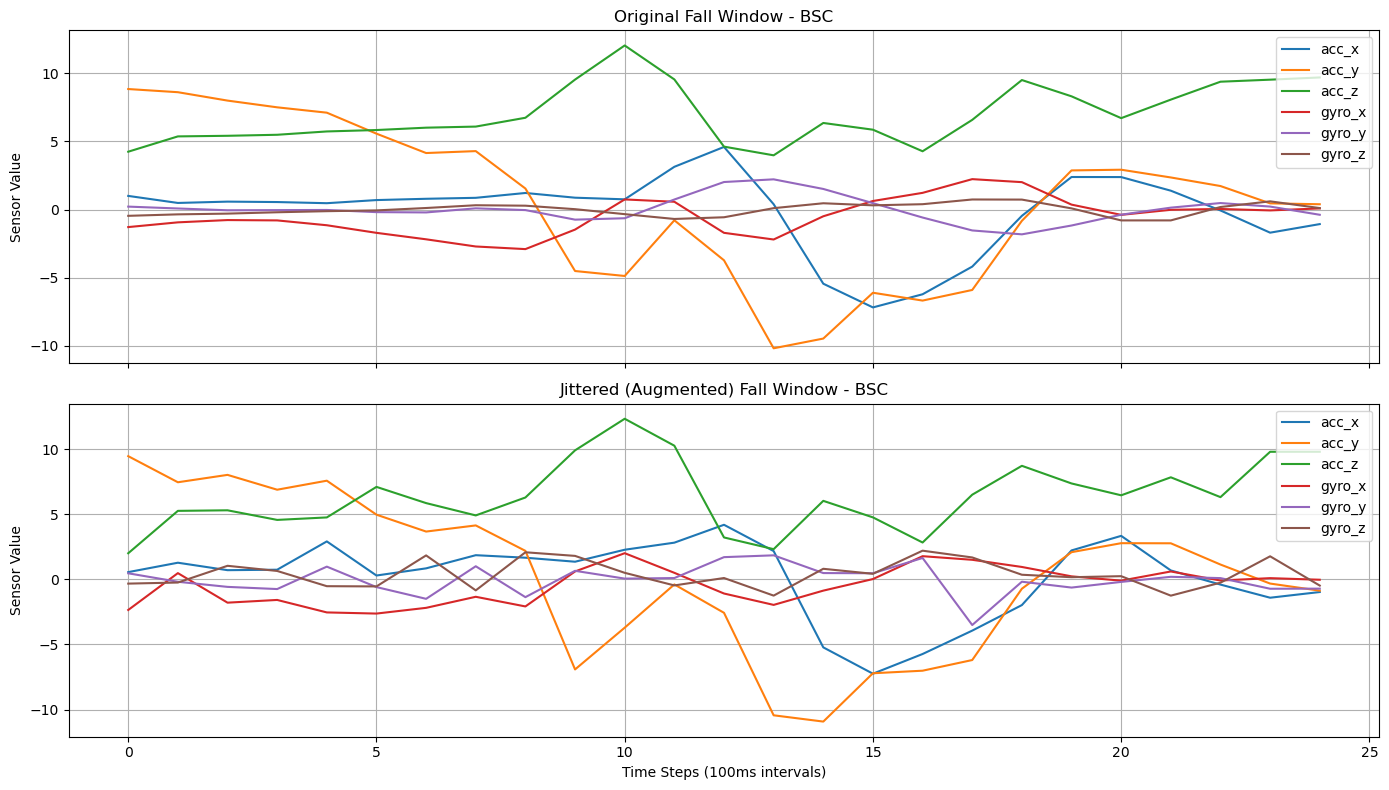

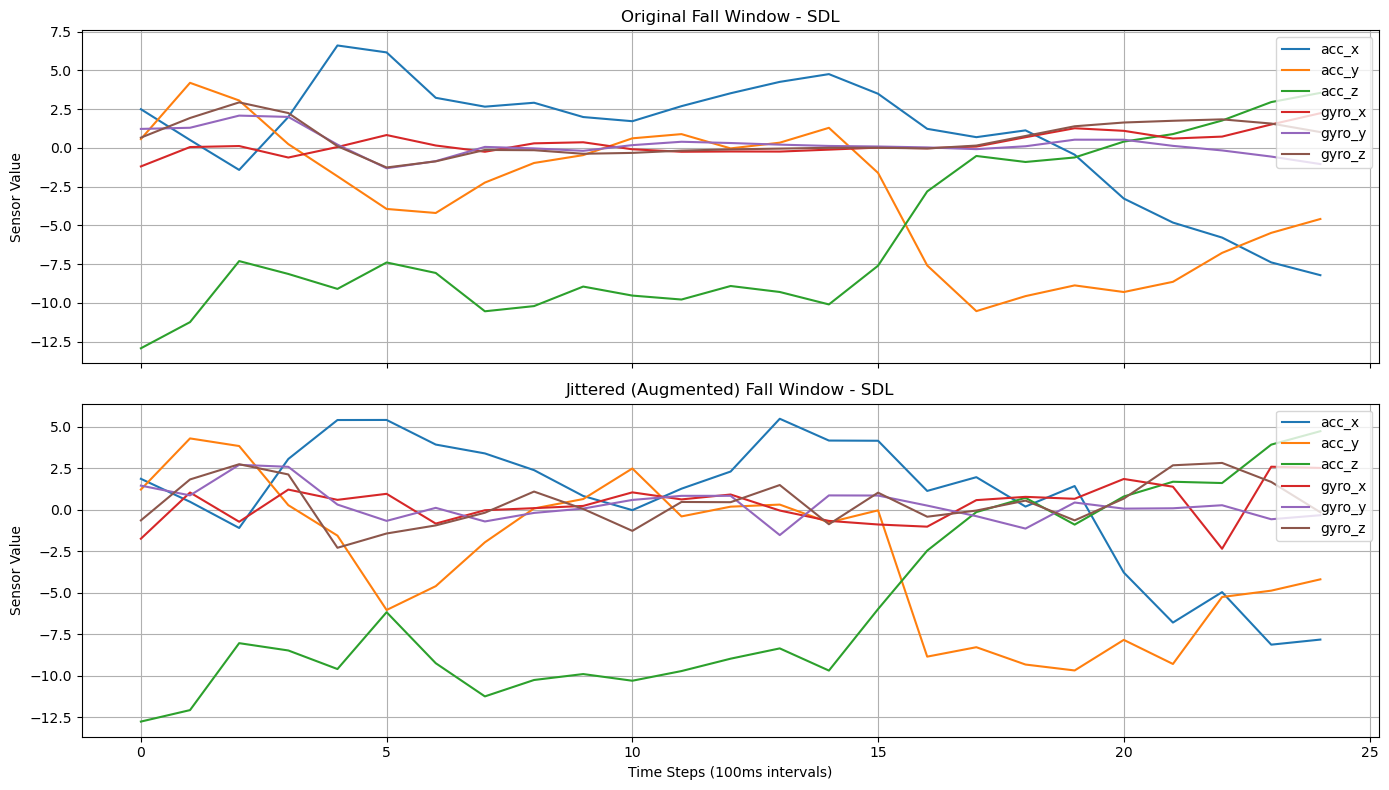

In [23]:
import matplotlib.pyplot as plt

fall_types = ['FOL', 'FKL', 'BSC', 'SDL']

# Go through each fall label and plot one sample
for label in fall_types:
    indices = np.where(y_fall == label)[0]
    if len(indices) == 0:
        print(f"No samples found for {label}")
        continue

    idx = np.random.choice(indices)
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
    
    for i in range(6):  # 6 sensor channels
        axes[0].plot(X_fall[idx, :, i], label=sensor_cols[i])
        axes[1].plot(X_fall_aug[idx, :, i], label=sensor_cols[i])
    
    axes[0].set_title(f"Original Fall Window - {label}")
    axes[1].set_title(f"Jittered (Augmented) Fall Window - {label}")
    axes[1].set_xlabel("Time Steps (100ms intervals)")
    for ax in axes:
        ax.set_ylabel("Sensor Value")
        ax.legend(loc="upper right")
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

### Combining all the windows and labels

In [24]:
from sklearn.utils import shuffle

X_all = np.concatenate([X_adl, X_fall, X_fall_aug], axis=0)
y_all = np.concatenate([y_adl, y_fall, y_fall_aug], axis=0)

# Shuffle to mix fall and ADL samples randomly
X_all, y_all = shuffle(X_all, y_all, random_state=42)

# Save the full dataset
with open("../data/processed/X_y_combined_augmented_.pkl", "wb") as f:
    pd.to_pickle((X_all, y_all), f)

print(f"Combined dataset shape: {X_all.shape}, Labels: {np.unique(y_all, return_counts=True)}")

Combined dataset shape: (72183, 25, 6), Labels: (array(['BSC', 'CHU', 'CSI', 'CSO', 'FKL', 'FOL', 'JOG', 'JUM', 'LYI',
       'SCH', 'SDL', 'SIT', 'STD', 'STN', 'STU', 'WAL'], dtype='<U3'), array([  932,   197,  1266,  1348,   780,   678,  4847,  4684,  4260,
         707,   824,  5024, 20813,  2549,  2768, 20506]))


In [25]:
# Reshape from (samples, time_steps, features) to (samples*time_steps, features)
n_samples, n_timesteps, n_features = X_all.shape
X_reshaped = X_all.reshape(-1, n_features)

# Apply z-score normalization
means = X_reshaped.mean(axis=0)
stds = X_reshaped.std(axis=0)
X_norm_reshaped = (X_reshaped - means) / stds

# Reshape back to original shape
X_all_norm = X_norm_reshaped.reshape(n_samples, n_timesteps, n_features)

# Save normalized dataset
with open("../data/processed/X_y_normalized_1.pkl", "wb") as f:
    pd.to_pickle((X_all_norm, y_all), f)

# Also save normalization params if needed later (e.g., during inference)
norm_params = {'mean': means, 'std': stds}
with open("../data/processed/normalization_params_1.pkl", "wb") as f:
    pd.to_pickle(norm_params, f)

print(f"Normalized shape: {X_all_norm.shape}, Sensor features: {n_features}")

Normalized shape: (72183, 25, 6), Sensor features: 6
